In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data=pd.read_csv('S:\\Data_Train.csv')
test_data=pd.read_csv('S:\Test_set.csv')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
#combining train and test datasets to work together on data
data=train_data.append(test_data)

C:\Users\sudee\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
data.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR ? DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU ? IXR ? BBI ? BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL ? LKO ? BOM ? COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU ? NAG ? BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR ? NAG ? DEL,Banglore,1 stop


In [7]:
data.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

# Feature generation

In [8]:
#divide the column into date,Month,Year
data['date']=data['Date_of_Journey'].str.split('/').str[0]
data['month']=data['Date_of_Journey'].str.split('/').str[1]
data['year']=data['Date_of_Journey'].str.split('/').str[2]
data['date']=data['date'].astype(int)
data['month']=data['month'].astype(int)
data['year']=data['year'].astype(int)

In [9]:
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]

In [10]:
#dividing arrival time into hour and minute
data['Arrival_hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arrival_minute']=data['Arrival_Time'].str.split(':').str[1]
data['Arrival_hour']=data['Arrival_hour'].astype(int)
data['Arrival_minute']=data['Arrival_minute'].astype(int)


In [11]:
#dividing departure time into hour and minute
data['Dep_hour']=data['Dep_Time'].str.split(':').str[0]
data['Dep_minute']=data['Dep_Time'].str.split(':').str[1]
data['Dep_hour']=data['Dep_hour'].astype(int)
data['Dep_minute']=data['Dep_minute'].astype(int)

In [12]:
#Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
              duration[i]='0h '+ duration[i] 

                
data['Duration']=duration
            
            
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

data['Duration_hours']=data['Duration'].apply(hour)
data['Duration_mins']=data['Duration'].apply(min)
data['Duration_hours']=data['Duration_hours'].astype(int)
data['Duration_mins']=data['Duration_mins'].astype(int)

In [13]:
#dropping unwanted columns
data=data.drop(columns=['Arrival_Time','Date_of_Journey','Dep_Time','Duration'])

In [14]:
data.dtypes

Additional_Info     object
Airline             object
Destination         object
Price              float64
Route               object
Source              object
Total_Stops         object
date                 int32
month                int32
year                 int32
Arrival_hour         int32
Arrival_minute       int32
Dep_hour             int32
Dep_minute           int32
Duration_hours       int32
Duration_mins        int32
dtype: object

# Dividing categorical data 

In [15]:
cat_data=[col for col in data.columns if data[col].dtype=='O']
cat_data

['Additional_Info', 'Airline', 'Destination', 'Route', 'Source', 'Total_Stops']

In [16]:
cont_data=[col for col in data.columns if data[col].dtype!='O']
cont_data

['Price',
 'date',
 'month',
 'year',
 'Arrival_hour',
 'Arrival_minute',
 'Dep_hour',
 'Dep_minute',
 'Duration_hours',
 'Duration_mins']

# Handling categorical data

In [17]:
categorical=data[cat_data]
categorical.head()

,Additional_Info,Airline,Destination,Route,Source,Total_Stops
0,No info,IndiGo,New Delhi,BLR ? DEL,Banglore,non-stop
1,No info,Air India,Banglore,CCU ? IXR ? BBI ? BLR,Kolkata,2 stops
2,No info,Jet Airways,Cochin,DEL ? LKO ? BOM ? COK,Delhi,2 stops
3,No info,IndiGo,Banglore,CCU ? NAG ? BLR,Kolkata,1 stop
4,No info,IndiGo,New Delhi,BLR ? NAG ? DEL,Banglore,1 stop


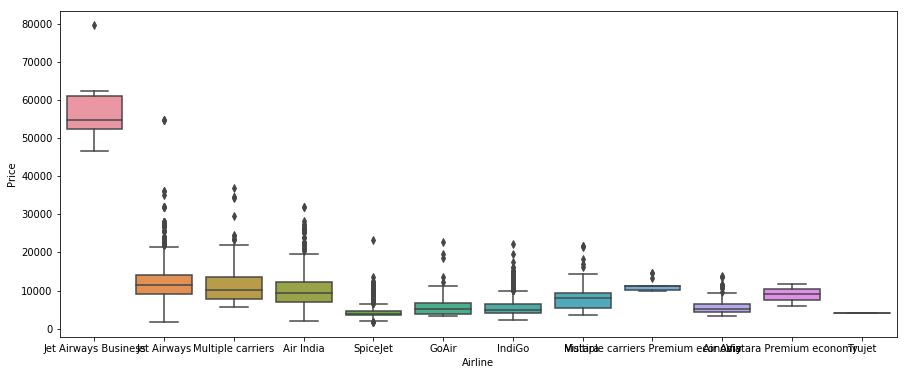

In [18]:
# let us now visualize the plot between airline and price 
plt.figure(figsize=(15,6))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))

Jet Airways Business have the highest Price from the above graph

In [19]:
categorical['Route_1']=categorical['Route'].str.split('?').str[0]
categorical['Route_2']=categorical['Route'].str.split('?').str[1]
categorical['Route_3']=categorical['Route'].str.split('?').str[2]
categorical['Route_4']=categorical['Route'].str.split('?').str[3]
categorical['Route_5']=categorical['Route'].str.split('?').str[4]
categorical=categorical.drop(columns=['Route'])

C:\Users\sudee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sudee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sudee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [20]:
#as additional_info column has mostly no info so we can drop it
categorical=categorical.drop(columns=['Additional_Info'])

In [21]:
#To convert categorical text data into model-understandable numerical data, we use the Label Encoder class
lb_encoder=LabelEncoder()
for i in categorical.columns:
    categorical[i]=lb_encoder.fit_transform(categorical[i])
categorical.head()
    

,Airline,Destination,Source,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,5,0,4,0,13,30,13,5
1,1,0,3,1,2,25,1,3,5
2,4,1,2,1,3,32,4,5,5
3,3,0,3,0,2,34,3,13,5
4,3,5,0,0,0,34,8,13,5


In [22]:
tot_data=pd.concat([categorical,data[cont_data]],axis=1)
tot_data.head()

,Airline,Destination,Source,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_mins
0,3,5,0,4,0,13,30,13,5,3897.0,24,3,2019,1,10,22,20,2,50
1,1,0,3,1,2,25,1,3,5,7662.0,1,5,2019,13,15,5,50,7,25
2,4,1,2,1,3,32,4,5,5,13882.0,9,6,2019,4,25,9,25,19,0
3,3,0,3,0,2,34,3,13,5,6218.0,12,5,2019,23,30,18,5,5,25
4,3,5,0,0,0,34,8,13,5,13302.0,1,3,2019,21,35,16,50,4,45


In [23]:
#divide the dataset into train and test
data_train=tot_data[0:10683]
data_test=tot_data[10683:]

In [24]:
data_test=data_test.drop(columns=['Price'])

In [25]:
data_train['Price']=data_train['Price'].astype(int)

C:\Users\sudee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# detecting outliers


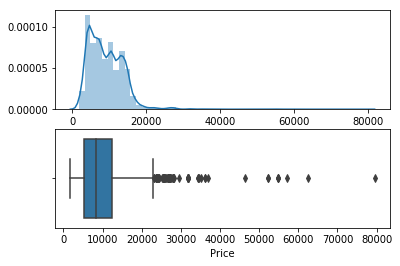

In [26]:
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(data_train['Price'],ax=ax1)
sns.boxplot(data_train['Price'],ax=ax2)

we can see that points after 40000 are outliers so we have to remove them

In [27]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\Users\sudee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


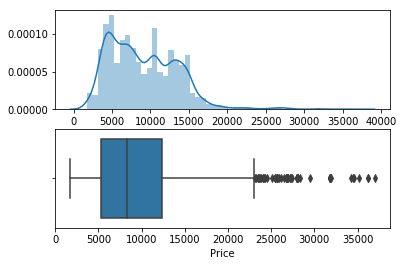

In [28]:
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(data_train['Price'],ax=ax1)
sns.boxplot(data_train['Price'],ax=ax2)

In [29]:
#divide dependent and independent variables
x=data_train.drop('Price',axis=1)
y=data_train['Price']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred=lin_reg.predict(x_test)
r2_score=metrics.r2_score(y_test,y_pred)
print('r2_score:',r2_score)
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.5336218127229762
MAE: 2199.3129696227256
MSE: 8734222.718744736
rmse: 2955.3718410285933
